# Demo of Evaluation and Benchmarking Functionalities

The following examples have been vastly implemented in functions in the file CellAnalysis/eval.py, CellAnalysis/adc_metric.py and in the modified package mAP_3Dvolume that has been forked from https://github.com/ygCoconut/mAP_3Dvolume. 

In [1]:
import os
import sys
path = os.path.dirname(os.path.abspath(""))+"/"
sys.path.append(path)

In [2]:
from CellAnalysis.eval import benchmark
import matplotlib.pyplot as plt

In [ ]:
from CellAnalysis.eval import benchmark
import os

path = os.path.dirname(os.path.abspath(""))+"/"
file_root = path + 'example_data/EM Data'
benchmark = benchmark(file_root, resolution=(0.51, 0.51, 0.51))

In [ ]:
benchmark.summarize(title='Electron Microscopy - Neuronal Cell Body Segmentation Results', save_to_file='EM_Results', error_bands=True, figsize=(24, 9))

In [ ]:
benchmark.plot_ap_curves(error_band=True)

In [ ]:
fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(14,6), sharey=True)

ax1 = benchmark.plot_error_bars(ax=ax1, metric='adc', legend_font_size=12)
ax2 = benchmark.plot_error_bars(ax=ax2, metric='adpc', legend_font_size=13)
ax3 = benchmark.plot_error_bars(ax=ax3, metric='adgc', legend_font_size=14)

In [ ]:
benchmark.show_adc_scores()

In [ ]:
benchmark.plot_error_bars(metric='AP @ 0.9')

In [3]:
from CellAnalysis.eval import evaluate

In [4]:
file_root = path + 'example_data/EM Data'
evala = evaluate(file_root, resolution=(0.51, 0.51, 0.51))

Load data of type EM Data ...
Load 3 Ground Truth test instance(s) ...
Dataloading finished succesfully!


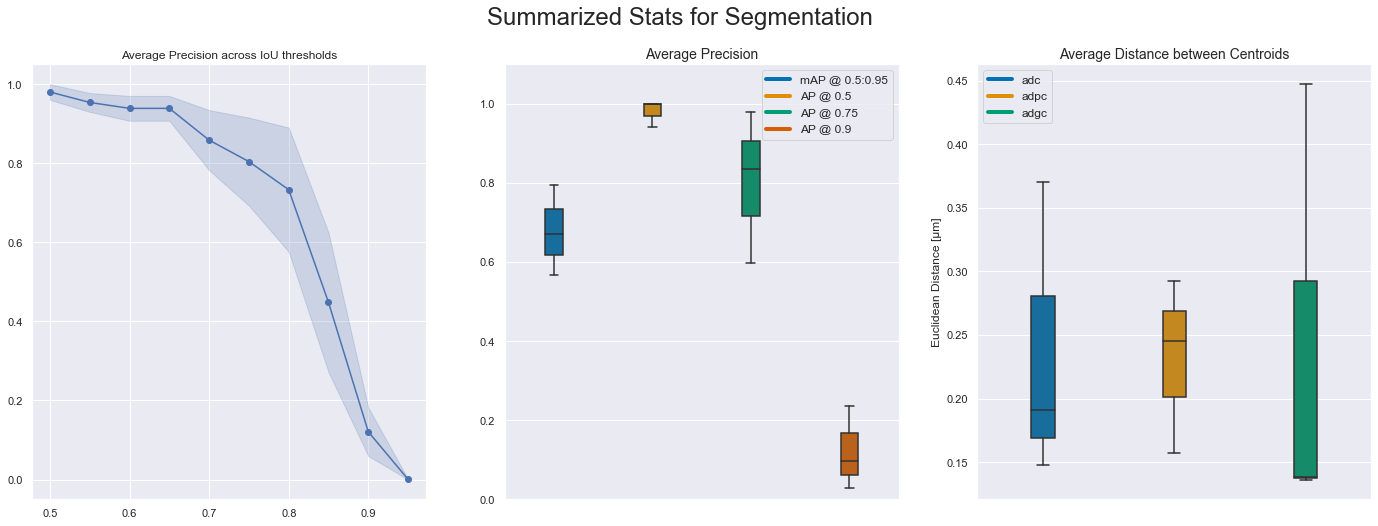

In [5]:
evala.summarize(figsize=(24, 8), error_bands=True)

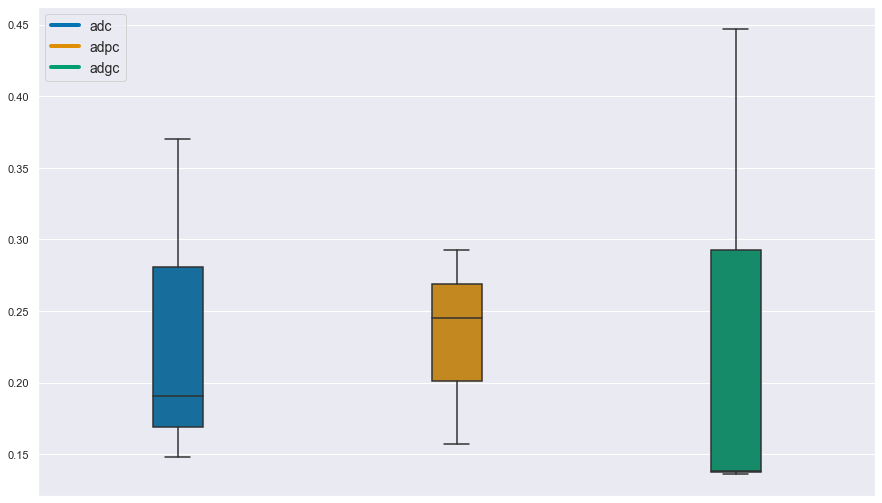

In [7]:
import seaborn as sns
fig, ax = plt.subplots(figsize=(15, 9))
sns.set()
evala.box_plots(ax, legend_font_size=14, legend_loc='upper left')
plt.show()

In [11]:
evala.adc_full

{'adc': {0: 0.14777355279499915,
  1: 0.3700228905680367,
  2: 0.19086303310019131},
 'adpc': {0: 0.15708172827836311,
  1: 0.29284711563337557,
  2: 0.24527974406763228},
 'adgc': {0: 0.13846537731163516,
  1: 0.4471986655026978,
  2: 0.13644632213275035},
 'adc_sem': {0: 0.04440908412872508,
  1: 0.197342662606684,
  2: 0.0652259763929012},
 'adpc_sem': {0: 0.04578782887231214,
  1: 0.16515307039103921,
  2: 0.11047912003630561},
 'adgc_sem': {0: 0.04303033938513802,
  1: 0.2295322548223288,
  2: 0.019972832749496804}}

In [9]:
import seaborn as sns

palette = sns.color_palette('colorblind')
palette

[(0.00392156862745098, 0.45098039215686275, 0.6980392156862745),
 (0.8705882352941177, 0.5607843137254902, 0.0196078431372549),
 (0.00784313725490196, 0.6196078431372549, 0.45098039215686275),
 (0.8352941176470589, 0.3686274509803922, 0.0),
 (0.8, 0.47058823529411764, 0.7372549019607844),
 (0.792156862745098, 0.5686274509803921, 0.3803921568627451),
 (0.984313725490196, 0.6862745098039216, 0.8941176470588236),
 (0.5803921568627451, 0.5803921568627451, 0.5803921568627451),
 (0.9254901960784314, 0.8823529411764706, 0.2),
 (0.33725490196078434, 0.7058823529411765, 0.9137254901960784)]

In [14]:
def summarize(self, title=None, save_to_file=None, figsize=None, error_bands=False):
    if title is None:
        title = 'Summarized Stats for Segmentation'
    if figsize is None:
        figsize = (20, 8.5)
    sns.set()
    fig = plt.figure(figsize=figsize)
    plt.rcParams['figure.constrained_layout.use'] = True
    plt.rcParams['figure.constrained_layout.h_pad'] = 0.01
    fig.suptitle(title, fontsize=24)
    font_size = 12
    gs = GridSpec(2, 5, figure=fig)
    ax1 = fig.add_subplot(gs[:, :2])
    ax2 = fig.add_subplot(gs[0, 2])
    ax3 = fig.add_subplot(gs[0, 3])
    ax4 = fig.add_subplot(gs[0, 4])
    ax5 = fig.add_subplot(gs[1, 2])
    ax6 = fig.add_subplot(gs[1, 3])
    ax7 = fig.add_subplot(gs[1, 4])

    self.plot_ap_curves(ax1, fontsize=12, error_band=error_bands)
    ax1.set_title('Average Precision across IoU thresholds')

    ax2 = self.plot_error_bars(ax2, metric='mAP @ 0.5:0.95', title='mean Average Precision (mAP) @ 0.5:0.95',
                                    fontsize=font_size, set_legend=True, legend_loc='lower left')
    ax3 = self.plot_error_bars(ax3, metric='AP @ 0.5', title='Average Precision (AP) @ 0.5',
                                    fontsize=font_size, set_legend=True, legend_loc='lower left')
    ax4 = self.plot_error_bars(ax4, metric='AP @ 0.75', title='Average Precision (AP) @ 0.75',
                                    fontsize=font_size, set_legend=True, legend_loc='lower left')
    ax2.set_ylim([0.0, 1.2])
    ax3.set_ylim([0.0, 1.2])
    ax4.set_ylim([0.0, 1.2])

    ax5 = self.plot_error_bars(ax5, metric='adc', title='ADC', fontsize=font_size, set_legend=True,
                                    legend_loc='upper left')
    ax6 = self.plot_error_bars(ax6, metric='adpc', title='ADPC (FN Error)', fontsize=font_size,
                                    set_legend=True, legend_loc='upper left')
    ax7 = self.plot_error_bars(ax7, metric='adgc', title='ADGC (FP Error)', fontsize=font_size,
                                    set_legend=True, legend_loc='upper left')
    ax5.set_ylim([0.0, 1.0])
    ax6.set_ylim([0.0, 1.0])
    ax7.set_ylim([0.0, 1.0])

    ax5.set_ylabel('Euclidean Distance [µm]', fontsize=font_size)
    mpl.rcParams['xtick.labelsize'] = 12
    mpl.rcParams['ytick.labelsize'] = 12


(0.4044212904941176, 0.5346434904470588, 0.9320019126352941)
(0.603162067917647, 0.7315274773529412, 0.9995652785372549)
(0.7867207013568628, 0.8448072103686275, 0.9398103849490196)
(0.9306685963333333, 0.818876999654902, 0.7591463906980392)
(0.9673165156666667, 0.6574708288078431, 0.5381601507294118)
(0.8846434386941177, 0.41001709788235297, 0.32250654924705885)
